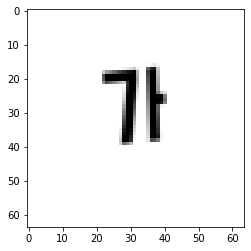

[1.000 0.000 0.000 0.000]
prediction :  0
해당 BMDOHYEON_가.png  이미지는 baemin 로 추정됩니다.


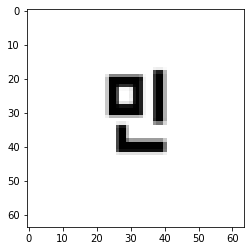

[1.000 0.000 0.000 0.000]
prediction :  0
해당 BMDOHYEON_민.PNG  이미지는 baemin 로 추정됩니다.


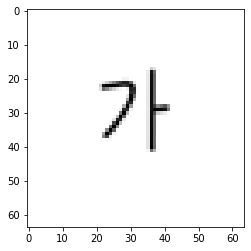

[0.000 1.000 0.000 0.000]
prediction :  1
해당 DXmovieMedium_가.PNG  이미지는 dxmovie 로 추정됩니다.


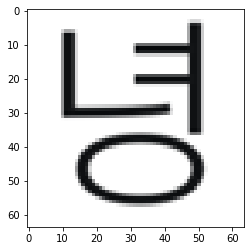

[0.000 0.000 0.000 1.000]
prediction :  3
해당 malgun_녕.PNG  이미지는 malgun 로 추정됩니다.


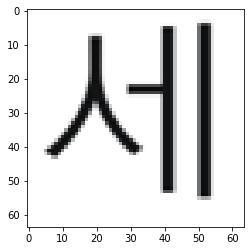

[0.000 0.000 0.000 1.000]
prediction :  3
해당 malgun_세.PNG  이미지는 malgun 로 추정됩니다.


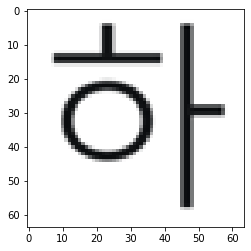

[0.000 0.000 0.000 1.000]
prediction :  3
해당 malgun_하.PNG  이미지는 malgun 로 추정됩니다.


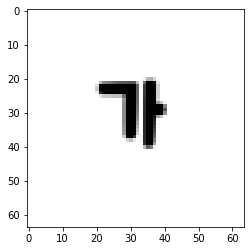

[0.000 0.000 1.000 0.000]
prediction :  2
해당 MaplestoryBold_가.PNG  이미지는 maple 로 추정됩니다.


In [2]:
from PIL import Image
import glob, numpy as np
from keras.models import load_model
import cv2
import matplotlib.pyplot as plt

real_test_dir = "./real_test"

X = []
filenames = []
for img in  glob.glob(real_test_dir+"/*.*"):
    image = Image.open(img)
    image = image.convert('RGB')
    image = image.resize((64,64))
    data = np.array(image)
    filenames.append(img)
    X.append(data)  

X = np.array(X)
model = load_model('./my_best_model.h5')

prediction = model.predict(X)
np.set_printoptions(formatter={'float': lambda x: "{0:0.3f}".format(x)})
cnt = 0

for count,i in enumerate(prediction):
    pre_ans = i.argmax() 
    plt.imshow(X[count])
    plt.show()    
    print(i)
    print("prediction : " ,pre_ans)
    pre_ans_str = ''
    if pre_ans == 0: pre_ans_str = "baemin"
    elif pre_ans == 1: pre_ans_str = "dxmovie"
    elif pre_ans == 2: pre_ans_str = "maple"
    elif pre_ans == 3: pre_ans_str = "malgun"
    
    if i[0] >= 0.8 : print("해당 " + filenames[count].split("\\")[1]+"  이미지는 "+pre_ans_str+" 로 추정됩니다.")
    if i[1] >= 0.8: print("해당 "  + filenames[count].split("\\")[1]+"  이미지는 "+pre_ans_str+" 로 추정됩니다.")
    if i[2] >= 0.8: print("해당 "  + filenames[count].split("\\")[1]+"  이미지는 "+pre_ans_str+" 로 추정됩니다.")
    if i[3] >= 0.8: print("해당 "  + filenames[count].split("\\")[1]+"  이미지는 "+pre_ans_str+" 로 추정됩니다.")
